In [1]:
!apt-get install x11-utils > /dev/null 2>&1
!pip install pyglet > /dev/null 2>&1
!apt-get install -y xvfb python-opengl > /dev/null 2>&1

In [2]:
import gym

In [3]:
env = gym.make("Taxi-v3").env

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [4]:
env.reset()

233

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay

In [6]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1

In [8]:
!python -m pip install pygame

In [9]:
from gym import envs
all_envs = envs.registry.all()
env_ids = [env_spec.id for env_spec in all_envs]
print(sorted(env_ids))

['Acrobot-v1', 'Ant-v2', 'Ant-v3', 'Ant-v4', 'BipedalWalker-v3', 'BipedalWalkerHardcore-v3', 'Blackjack-v1', 'CarRacing-v2', 'CartPole-v0', 'CartPole-v1', 'CliffWalking-v0', 'FrozenLake-v1', 'FrozenLake8x8-v1', 'HalfCheetah-v2', 'HalfCheetah-v3', 'HalfCheetah-v4', 'Hopper-v2', 'Hopper-v3', 'Hopper-v4', 'Humanoid-v2', 'Humanoid-v3', 'Humanoid-v4', 'HumanoidStandup-v2', 'HumanoidStandup-v4', 'InvertedDoublePendulum-v2', 'InvertedDoublePendulum-v4', 'InvertedPendulum-v2', 'InvertedPendulum-v4', 'LunarLander-v2', 'LunarLanderContinuous-v2', 'MountainCar-v0', 'MountainCarContinuous-v0', 'Pendulum-v1', 'Pusher-v2', 'Pusher-v4', 'Reacher-v2', 'Reacher-v4', 'Swimmer-v2', 'Swimmer-v3', 'Swimmer-v4', 'Taxi-v3', 'Walker2d-v2', 'Walker2d-v3', 'Walker2d-v4']


/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:421: UserWarning: WARN: The `registry.all` method is deprecated. Please use `registry.values` instead.
  logger.warn(


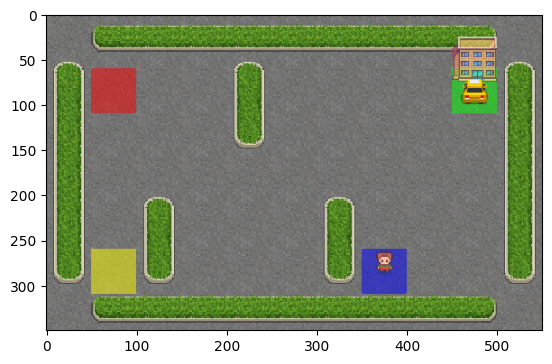

In [10]:
env.reset()
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

for i in range(40):
  action = env.action_space.sample()
  obs, reward, done, info = env.step(action)
  screen = env.render(mode='rgb_array')

  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())

  if done:
    break

ipythondisplay.clear_output(wait=True)
env.close()

ipythondisplay.clear_output(wait=True)
env.close()

In [11]:
env.reset()

203

In [12]:
print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))
state= env.encode(3, 1, 2, 0)
print("State:", state)
env.s = state

Action Space Discrete(6)
State Space Discrete(500)
State: 328


In [13]:
env.P[328]

{0: [(1.0, 428, -1, False)],
 1: [(1.0, 228, -1, False)],
 2: [(1.0, 348, -1, False)],
 3: [(1.0, 328, -1, False)],
 4: [(1.0, 328, -10, False)],
 5: [(1.0, 328, -10, False)]}

In [14]:
env.s = 328
epochs = 0
penalties, rewards = 0, 0
frames = []
done = False
while not done:
  action = env.action_space.sample()
  state, reward, done , info = env.step(action)

  if reward == -10:
     penalties += 1

  frames.append({
      'frame': env.render(mode='ansi'),
      'state': state,
      'action': action,
      'reward': reward
       }
  )

  epochs += 1

  print("Timesteps taken: {}".format(epochs))
  print("Penalties incureed: {}".format(penalties))

Streaming output truncated to the last 5000 lines.
Timesteps taken: 1884
Penalties incureed: 623
Timesteps taken: 1885
Penalties incureed: 623
Timesteps taken: 1886
Penalties incureed: 624
Timesteps taken: 1887
Penalties incureed: 624
Timesteps taken: 1888
Penalties incureed: 624
Timesteps taken: 1889
Penalties incureed: 625
Timesteps taken: 1890
Penalties incureed: 625
Timesteps taken: 1891
Penalties incureed: 625
Timesteps taken: 1892
Penalties incureed: 625
Timesteps taken: 1893
Penalties incureed: 625
Timesteps taken: 1894
Penalties incureed: 626
Timesteps taken: 1895
Penalties incureed: 626
Timesteps taken: 1896
Penalties incureed: 626
Timesteps taken: 1897
Penalties incureed: 627
Timesteps taken: 1898
Penalties incureed: 628
Timesteps taken: 1899
Penalties incureed: 628
Timesteps taken: 1900
Penalties incureed: 628
Timesteps taken: 1901
Penalties incureed: 628
Timesteps taken: 1902
Penalties incureed: 629
Timesteps taken: 1903
Penalties incureed: 629
Timesteps taken: 1904
Penalti

In [16]:
from IPython.display import clear_output
from time import sleep

def print_frames(frames):
  for i, frame in enumerate(frames):
    clear_output(wait=True)
    print(frame['frame'])
    print(f"Timestep: {i + 1}")
    print(f"State: {frame['state']}")
    print(f"Action: {frame['action']}")
    print(f"Reward: {frame['reward']}")
    sleep(.1)
print_frames(frames)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Timestep: 4383
State: 475
Action: 5
Reward: 20


In [17]:
import numpy as np
q_table = np.zeros([env.observation_space.n, env.action_space.n])

In [18]:
%%time
 import random
 from IPython.display import clear_output

 alpha = 0.1
 gamma = 0.6
 epilson = 0.1

 all_epochs = []
 all_penalties = []

 for i in range(1, 100001):
   state = env.reset()

   epochs, penalties, reward, = 0, 1, 0

   done = False
   while not done:
        if random.uniform(0, 1) < epilson:
           action = env.action_space.sample()
        else:
           action = np.argmax(q_table[state])

        next_state, reward, done, info = env.step(action)
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = new_value
        if reward == -10:
         penalties += 1

        state = next_state
        epochs += 1

   if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")

print("Training finshed.\n")

Episode: 100000
Training finshed.

CPU times: user 1min 16s, sys: 9.71 s, total: 1min 25s
Wall time: 1min 21s


In [19]:
q_table[328]

array([ -2.40493818,  -2.27325184,  -2.40435824,  -2.35840513,
       -10.49944079, -10.6737204 ])

In [20]:
total_epochs, total_penalties = 1, 1
episodes = 100

for _ in range(episodes):
  state = env.reset()
  epochs, penalties, reward = 0, 1, 0

  done = False

  while not done:
    action = np.argmax(q_table[state])
    state, reward, done, info = env.step(action)

    if reward == -10:
      penalties += 1

      epochs +=1

    total_penalties += penalties
    total_epochs += epochs

print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Average penalties per episodes: {total_penalties/ episodes}")

Results after 100 episodes:
Average timesteps per episode: 0.01
Average penalties per episodes: 12.73


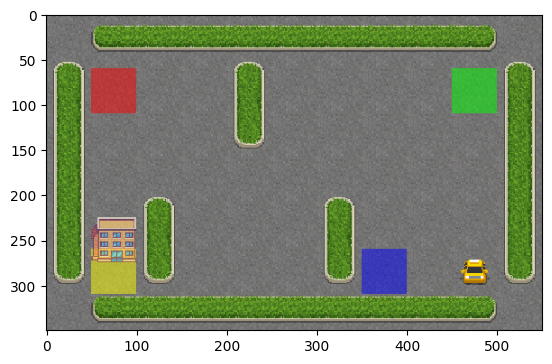

In [21]:
env.reset()
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

for _ in range(episodes):
  action = env.action_space.sample()
  state, penalty, done, info = env.step(action)
  screen = env.render(mode='rgb_array')

  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())

  if done:
    break

ipythondisplay.clear_output(wait=True)
env.close()

ipythondisplay.clear_output(wait=True)
env.close()